<h1>Capstone Project: The Battle of Neighbourhoods<h1>
<h3>Table of Content<h3>
<h4>1.Introduction<h4>
Bangkok is capital and most populous city of Thailand. It is known in Thai as Krung Thep Maha Nakhon or Krung Thep.The city occupies 1,568.7 square kilometres (605.7 sq mi) in the Chao Phraya River delta in central Thailand and has a population of over eight million, 12.6 percent of the country's population. Over fourteen million people (22.2 percent) lived within the surrounding Bangkok Metropolitan Region at the 2010 census, making Bangkok the nation's primate city, dwarfing Thailand's other urban centres in both size and importance to the national economy.

Bangkok traces its roots to a small trading post during the Ayutthaya Kingdom in the 15th century, which eventually grew and became the site of two capital cities: Thonburi in 1768 and Rattanakosin in 1782. Bangkok was at the heart of the modernization of Siam, later renamed Thailand, during the late-19th century, as the country faced pressures from the West. The city was at the centre of Thailand's political struggles throughout the 20th century, as the country abolished absolute monarchy, adopted constitutional rule, and underwent numerous coups and several uprisings. The city grew rapidly during the 1960s through the 1980s and now exerts a significant impact on Thailand's politics, economy, education, media and modern society.
    
 <h4>Target of audience<h4>
 Considering the diversity of Bangkok and also destination of tourist so this report was given analysis data of restaurants inorder to determine the dermaine of target place ("Latkrabang district) and also District around bangkok with population data from Wikipedia.

<h4>2.Data<h4>
    This project will rely on public data from Wikipedia and Four square.

In [121]:
# library for BeautifulSoup
from bs4 import BeautifulSoup

# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy

print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time


!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
print('matplotlib imported...')
print('...Done')


numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
matplotlib imported...
...Done


<h4>Scrping data from Wikipedia <h4>

In [122]:
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
wikipedia_page = requests.get(wikipedia_link, headers = headers)
wikipedia_page

<Response [200]>

In [123]:
# Cleans html file
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody

In [124]:

# Extracts all "tr" (table rows) within the table above
rows = table.find_all('tr')

In [125]:
# Extracts the column headers, removes and replaces possible '\n' with space for the "th" tag
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]

In [126]:
# Converts columns to pd dataframe
df = pd.DataFrame(columns = columns)
df

,District(Khet),Postcode,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude


In [127]:
#Extracts every row with corresponding columns
# Then appends the values to the create pd dataframe "df"
# Please note that the first row (row[0]) is skipped because it is already the header
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 8:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df

In [128]:
df.head(5)

,District(Khet),Postcode,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
0,Bang Bon,10150,บางบอน,"105,161",4,13.6592,100.3991
1,Bang Kapi,10240,บางกะปิ,"148,465",2,13.765833,100.647778
2,Bang Khae,10160,บางแค,"191,781",4,13.696111,100.409444
3,Bang Khen,10220,บางเขน,"189,539",2,13.873889,100.596389
4,Bang Kho Laem,10120,บางคอแหลม,"94,956",3,13.693333,100.5025


In [129]:
df = df.rename(index=str, columns = {'District(Khet)': 'District', 'Postcode': 'Postcode', 'Thai': 'Thai', 'Population': 'Population', 'No. ofSubdistricts(Khwaeng)': 'Subdistricts', 'Latitude': 'Latitude', 'Longitude': 'Longitude'})

In [130]:
df.head(5)

,District,Postcode,Thai,Population,Subdistricts,Latitude,Longitude
0,Bang Bon,10150,บางบอน,"105,161",4,13.6592,100.3991
1,Bang Kapi,10240,บางกะปิ,"148,465",2,13.765833,100.647778
2,Bang Khae,10160,บางแค,"191,781",4,13.696111,100.409444
3,Bang Khen,10220,บางเขน,"189,539",2,13.873889,100.596389
4,Bang Kho Laem,10120,บางคอแหลม,"94,956",3,13.693333,100.5025


In [131]:
df.shape

(50, 7)

In [132]:
df0 = df[['District', 'Population', 'Latitude','Longitude']].reset_index(drop=True)
df0.head()

,District,Population,Latitude,Longitude
0,Bang Bon,"105,161",13.6592,100.3991
1,Bang Kapi,"148,465",13.765833,100.647778
2,Bang Khae,"191,781",13.696111,100.409444
3,Bang Khen,"189,539",13.873889,100.596389
4,Bang Kho Laem,"94,956",13.693333,100.5025


In [133]:
df0.shape

(50, 4)

In [134]:
df_bangkok = df0
df_bangkok.to_csv('BangkokLocations.csv', index = False)


In [135]:
fileName = "BangkokLocations.csv"
linkName = "BangkokLocations"


In [136]:
df_bangkok.loc[df_bangkok['District'] == 'Lat Krabang']

,District,Population,Latitude,Longitude
24,Lat Krabang,"163,175",13.722317,100.759669


In [137]:
df_bangkok.loc[24, 'District']

'Lat Krabang'

In [138]:
latkrabang_lat = df_bangkok.loc[24, 'Latitude']
latkrabang_long = df_bangkok.loc[24, 'Longitude']
latkrabang_dis = df_bangkok.loc[24, 'District']
latkrabang_population = df_bangkok.loc[24, 'Population']

print('The latitude and longitude values of {} with Population {}, are {}, {}.'.format(latkrabang_dis,
                                                                                         latkrabang_population,
                                                                                         latkrabang_lat,
                                                                                         latkrabang_long))

The latitude and longitude values of Lat Krabang with Population 163,175, are 13.722317, 100.759669.


<h4>3.Data Exploration<h4>
<h4>Use fousquare to obtain venues of Latkrabang district as nearby of targert location <h4>

In [139]:
CLIENT_ID = 'RI0QRITZ3HM4F1ZFO4FDVAC01NUZRG4RGW35I0BQNJFZZZRR' # your Foursquare ID
CLIENT_SECRET = '0HGMG13LWMZMOOV1ZELN1NJTI0UFQ5RHGQTVEPDKCKLV5NNB' # your Foursquare Secret
VERSION = '20181216' # Foursquare API version
LIMIT = 80
radius= 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latkrabang_lat, 
    latkrabang_long, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RI0QRITZ3HM4F1ZFO4FDVAC01NUZRG4RGW35I0BQNJFZZZRR&client_secret=0HGMG13LWMZMOOV1ZELN1NJTI0UFQ5RHGQTVEPDKCKLV5NNB&v=20181216&ll=13.722317,100.759669&radius=1000&limit=80'

In [140]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ead75bbc8cff2001bba0279'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lat Krabang',
  'headerFullLocation': 'Lat Krabang, Bangkok',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 43,
  'suggestedBounds': {'ne': {'lat': 13.731317009000009,
    'lng': 100.76891614818462},
   'sw': {'lat': 13.713316990999992, 'lng': 100.75042185181539}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53941628498ea90b2e55817f',
       'name': 'Alchemist Coffee Bar',
       'location': {'address': 'Lat Krabang Rd.',
        'lat': 13.721708286042537,
        'lng': 100.76038630626421,
        'labeledLatLngs': [{'label': 'display',
          

In [141]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [142]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [143]:
nearby_venues

,name,categories,lat,lng
0,Alchemist Coffee Bar,Café,13.721708,100.760386
1,พิกุลทองจิ้มจุ่มเมี่ยงปลา,Thai Restaurant,13.721965,100.761559
2,คูณสิน เป็ดย่างอบน้ำผึ้ง,Thai Restaurant,13.722463,100.752902
3,เม้งโภชนา,Asian Restaurant,13.721365,100.757501
4,Catch Up Cafe,Café,13.723288,100.753606
5,Panini Residence,Hotel,13.720769,100.756621
6,All Season (ออลซีซัน ข้าวแกงใต้),Thai Restaurant,13.721371,100.756176
7,All Six To Twelve,Food & Drink Shop,13.721885,100.764524
8,Lilac Relax-residence,Hotel,13.723435,100.753838
9,ป.ประทีป ก๋วยเตี๋ยวเรือ,Restaurant,13.721918,100.755172


In [144]:
nearby_venues_latkrabang_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')

In [145]:
nearby_venues_latkrabang_unique.head(5)

,Count
Thai Restaurant,8
Hotel,5
Café,4
Noodle House,3
Asian Restaurant,2


In [146]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

43 venues were returned by Foursquare.


<h4>Use fousquare to obtain venues of Bangkok location<h4>

In [147]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [148]:
bangkok_venues = getNearbyVenues(names=df_bangkok['District'],
                                   latitudes=df_bangkok['Latitude'],
                                   longitudes=df_bangkok['Longitude']
                                  )

Bang Bon
Bang Kapi
Bang Khae
Bang Khen
Bang Kho Laem
Bang Khun Thian
Bang Na
Bang Phlat
Bang Rak
Bang Sue
Bangkok Noi
Bangkok Yai
Bueng Kum
Chatuchak
Chom Thong
Din Daeng
Don Mueang
Dusit
Huai Khwang
Khan Na Yao
Khlong Sam Wa
Khlong San
Khlong Toei
Lak Si
Lat Krabang
Lat Phrao
Min Buri
Nong Chok
Nong Khaem
Pathum Wan
Phasi Charoen
Phaya Thai
Phra Khanong
Phra Nakhon
Pom Prap Sattru Phai
Prawet
Rat Burana
Ratchathewi
Sai Mai
Samphanthawong
Saphan Sung
Sathon
Suan Luang
Taling Chan
Thawi Watthana
Thon Buri
Thung Khru
Wang Thonglang
Watthana
Yan Nawa


In [149]:
bangkok_venues.shape

(2640, 7)

In [150]:
len(bangkok_venues)

2640

In [151]:
bangkok_venues.head(5)

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
1,Bang Bon,13.6592,100.3991,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
2,Bang Bon,13.6592,100.3991,ร้านต้นไม้ ริมถนนกาญจนาภิเษก,13.654098,100.405054,Garden Center
3,Bang Bon,13.6592,100.3991,ส.สุขโภชนา,13.660358,100.404866,Chinese Restaurant
4,Bang Bon,13.6592,100.3991,เจ๊ไน้ ก๋วยเตี๋ยวเป็ดตุ๋น,13.654137,100.405323,Noodle House


In [152]:
bangkok_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Bang Bon,26,26,26,26,26,26
Bang Kapi,80,80,80,80,80,80
Bang Khae,25,25,25,25,25,25
Bang Khen,67,67,67,67,67,67
Bang Kho Laem,54,54,54,54,54,54
Bang Khun Thian,80,80,80,80,80,80
Bang Na,23,23,23,23,23,23
Bang Phlat,29,29,29,29,29,29
Bang Rak,80,80,80,80,80,80


In [153]:
print('There are {} uniques categories.'.format(len(bangkok_venues['Venue Category'].unique())))

There are 227 uniques categories.


In [154]:
bangkok_venues_unique_count = bangkok_venues['Venue Category'].value_counts().to_frame(name='Count')

In [155]:
bangkok_venues_unique_count.head(5)

,Count
Noodle House,254
Thai Restaurant,199
Coffee Shop,186
Convenience Store,168
Café,99


In [156]:
bangkok_venues_unique_count.describe()

,Count
count,227.000000
mean,11.629956
std,29.843761
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,254.000000


<h4>Clustering<h4>

In [157]:
address = 'Bangkok, Thailand'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 13.7542529, 100.493087.


In [158]:
for lat, lng, district, pop in zip(df_bangkok['Latitude'], 
                                  df_bangkok['Longitude'],
                                  df_bangkok['District'],
                                  df_bangkok['Population']):
    label = '{} - {}'.format(pop, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5).add_to(map_bangkok)  
    
display(map_bangkok)

In [159]:
type(df_bangkok)

pandas.core.frame.DataFrame

In [160]:
bangkok_onehot = pd.get_dummies(bangkok_venues[['Venue Category']], prefix = "", prefix_sep = "")

In [161]:
bangkok_onehot['District'] = bangkok_venues['District']

In [162]:
fixed_columns = [bangkok_onehot.columns[-1]] + list(bangkok_onehot.columns[:-1])
bangkok_onehot = bangkok_onehot[fixed_columns]

In [163]:
bangkok_onehot.head(5)

,District,Accessories Store,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Canal,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comic Shop,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Hardware Store,Historic Site,History Museum,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Gym,Palace,Paper / Office Supplies Store,Park,Pet Café,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Som Tum Restaurant,Soup Place,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toll Booth,Toll Plaza,Tonkatsu Restaurant,Tour Provider,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Zoo,Zoo Exhibit
0,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [164]:
bangkok_onehot.loc[bangkok_onehot['Coffee Shop'] != 0]

,District,Accessories Store,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Canal,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comic Shop,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Hardware Store,Historic Site,History Museum,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Gym,Palace,Paper / Office Supplies Store,Park,Pet Café,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Som Tum Restaurant,Soup Place,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toll Booth,Toll Plaza,Tonkatsu Restaurant,Tour Provider,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Zoo,Zoo Exhibit
10,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [165]:
bangkok_onehot.loc[bangkok_onehot['District'] == 'Lat Krabang']

,District,Accessories Store,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Canal,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comic Shop,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Hardware Store,Historic Site,History Museum,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Gym,Palace,Paper / Office Supplies Store,Park,Pet Café,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Som Tum Restaurant,Soup Place,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toll Booth,Toll Plaza,Tonkatsu Restaurant,Tour Provider,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Zoo,Zoo Exhibit
1219,Lat Krabang,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1220,Lat Krabang,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [166]:
bangkok_onehot.to_csv('bangkok_onehot.csv', index = False)
bangkok_onehot.shape

(2640, 228)

In [167]:
bangkok_grouped = bangkok_onehot.groupby('District').mean().reset_index()
bangkok_grouped.head()

,District,Accessories Store,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Canal,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comic Shop,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Hardware Store,Historic Site,History Museum,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Gym,Palace,Paper / Office Supplies Store,Park,Pet Café,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Som Tum Restaurant,Soup Place,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toll Booth,Toll Plaza,Tonkatsu Restaurant,Tour Provider,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Zoo,Zoo Exhibit
0,Bang Bon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.038462,0.000000,0.0,0.000000,0.038462,0.0,0.0,0.0,0.0,0.000000,0.0,0.038462,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.038462,0.0,0.0,0.076923,0.00,0.0,0.115385,0.0,0.0,0.0000,0.115385,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.000000,0.038462,0.0,0.0000,0.0,0.076923,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.038462,0.038462,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0000,0.0000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.115385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.00,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.000000,0

In [168]:
print("Before One-hot encoding:", df_bangkok.shape)
print("After One-hot encoding:", bangkok_grouped.shape)

Before One-hot encoding: (50, 4)
After One-hot encoding: (50, 228)


In [169]:
num_top_venues = 10 # Top common venues needed

for dis in bangkok_grouped['District']:
    print("----"+dis+"----")
    temp = bangkok_grouped[bangkok_grouped['District'] == dis].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')
   

----Bang Bon----
                venue  freq
0   Convenience Store  0.12
1     Thai Restaurant  0.12
2        Noodle House  0.12
3         Coffee Shop  0.12
4  Chinese Restaurant  0.08
5         Flower Shop  0.08
6                Café  0.04
7         Gas Station  0.04
8       Garden Center  0.04
9  Som Tum Restaurant  0.04


----Bang Kapi----
                  venue  freq
0           Coffee Shop  0.10
1   Japanese Restaurant  0.08
2       Thai Restaurant  0.08
3    Som Tum Restaurant  0.05
4        Clothing Store  0.05
5          Noodle House  0.05
6     Hotpot Restaurant  0.04
7            Steakhouse  0.04
8  Fast Food Restaurant  0.04
9          Dessert Shop  0.04


----Bang Khae----
                  venue  freq
0          Noodle House  0.20
1     Convenience Store  0.16
2        Shop & Service  0.08
3         Shopping Mall  0.08
4           Video Store  0.04
5     Food & Drink Shop  0.04
6   Japanese Restaurant  0.04
7  Fast Food Restaurant  0.04
8      Asian Restaurant  0.04
9    

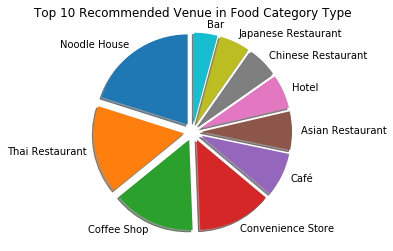

,Venue Category,Venue
0,Noodle House,254
1,Thai Restaurant,199
2,Coffee Shop,186
3,Convenience Store,168
4,Café,99
5,Asian Restaurant,87
6,Hotel,77
7,Chinese Restaurant,70
8,Japanese Restaurant,70
9,Bar,53


In [170]:
top_10_venue =  bangkok_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)[:10].reset_index()
labels = top_10_venue['Venue Category']
sizes  = top_10_venue['Venue']
explode = [.1] * 10
# Plot
plt.title("Top 10 Recommended Venue in Food Category Type")
ax1 = plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
plt.axis('equal')
plt.show()
top_10_venue

In [171]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [172]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = bangkok_grouped['District']

for ind in np.arange(bangkok_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangkok_grouped.iloc[ind, :], num_top_venues)

In [173]:
district_venues_sorted.dtypes

District                  object
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
8th Most Common Venue     object
9th Most Common Venue     object
10th Most Common Venue    object
dtype: object

In [174]:
district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,Noodle House,Coffee Shop,Thai Restaurant,Convenience Store,Flower Shop,Chinese Restaurant,Automotive Shop,Garden Center,Café,Bistro
1,Bang Kapi,Coffee Shop,Japanese Restaurant,Thai Restaurant,Noodle House,Som Tum Restaurant,Clothing Store,Steakhouse,Hotpot Restaurant,Fast Food Restaurant,Dessert Shop
2,Bang Khae,Noodle House,Convenience Store,Shopping Mall,Shop & Service,Diner,Asian Restaurant,Bus Stop,Food & Drink Shop,Miscellaneous Shop,Coffee Shop
3,Bang Khen,Convenience Store,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Noodle House,Bookstore,Hotpot Restaurant,Steakhouse,Supermarket,Food Truck
4,Bang Kho Laem,Thai Restaurant,Noodle House,Coffee Shop,Convenience Store,Chinese Restaurant,Seafood Restaurant,Café,Pub,Asian Restaurant,Hotel


In [175]:
district_venues_sorted.to_csv('district_venues_sorted.csv', index = False)
bangkok_grouped_clustering = bangkok_grouped.drop('District', 1)

In [176]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(bangkok_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 0, 4, 2, 4, 2, 1, 2, 0], dtype=int32)

In [177]:
kmeans.labels_[0:10]

array([1, 4, 0, 4, 2, 4, 2, 1, 2, 0], dtype=int32)

In [178]:
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [179]:
bangkok_merged = df_bangkok

In [180]:
bangkok_merged.head(3)

,District,Population,Latitude,Longitude
0,Bang Bon,"105,161",13.6592,100.3991
1,Bang Kapi,"148,465",13.765833,100.647778
2,Bang Khae,"191,781",13.696111,100.409444


In [181]:
bangkok_merged_latlong = bangkok_merged.join(district_venues_sorted.set_index('District'), on = 'District')

In [182]:
bangkok_merged_latlong.head(5)

,District,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,"105,161",13.6592,100.3991,1,Noodle House,Coffee Shop,Thai Restaurant,Convenience Store,Flower Shop,Chinese Restaurant,Automotive Shop,Garden Center,Café,Bistro
1,Bang Kapi,"148,465",13.765833,100.647778,4,Coffee Shop,Japanese Restaurant,Thai Restaurant,Noodle House,Som Tum Restaurant,Clothing Store,Steakhouse,Hotpot Restaurant,Fast Food Restaurant,Dessert Shop
2,Bang Khae,"191,781",13.696111,100.409444,0,Noodle House,Convenience Store,Shopping Mall,Shop & Service,Diner,Asian Restaurant,Bus Stop,Food & Drink Shop,Miscellaneous Shop,Coffee Shop
3,Bang Khen,"189,539",13.873889,100.596389,4,Convenience Store,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Noodle House,Bookstore,Hotpot Restaurant,Steakhouse,Supermarket,Food Truck
4,Bang Kho Laem,"94,956",13.693333,100.5025,2,Thai Restaurant,Noodle House,Coffee Shop,Convenience Store,Chinese Restaurant,Seafood Restaurant,Café,Pub,Asian Restaurant,Hotel


In [183]:
bangkok_clusters = bangkok_merged_latlong

In [184]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, pop, cluster in zip(bangkok_clusters['Latitude'], bangkok_clusters['Longitude'], bangkok_clusters['Population'], bangkok_clusters['Cluster Labels']):
    label = folium.Popup(str(pop) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

In [185]:
bangkok_clusters.loc[bangkok_clusters['Cluster Labels'] == 0, bangkok_clusters.columns[[0]+[1] + list(range(5, bangkok_clusters.shape[1]))]]


,District,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bang Khae,"191,781",Noodle House,Convenience Store,Shopping Mall,Shop & Service,Diner,Asian Restaurant,Bus Stop,Food & Drink Shop,Miscellaneous Shop,Coffee Shop
9,Bang Sue,"132,234",Noodle House,Thai Restaurant,Convenience Store,Train Station,Ice Cream Shop,Coffee Shop,Hotpot Restaurant,Asian Restaurant,Restaurant,Fast Food Restaurant
10,Bangkok Noi,"117,793",Noodle House,Convenience Store,Som Tum Restaurant,Thai Restaurant,Steakhouse,Asian Restaurant,Mobile Phone Shop,Coffee Shop,Chinese Restaurant,Park
11,Bangkok Yai,"72,321",Noodle House,Asian Restaurant,Dessert Shop,Convenience Store,Farmers Market,Coffee Shop,Train Station,Department Store,Chinese Restaurant,Soup Place
17,Dusit,"107,655",Noodle House,Thai Restaurant,Convenience Store,Asian Restaurant,Café,Coffee Shop,Palace,Italian Restaurant,Restaurant,Som Tum Restaurant
38,Sai Mai,"188,123",Noodle House,Convenience Store,Market,Thai Restaurant,Diner,Asian Restaurant,Café,Shopping Mall,Bar,Soup Place
41,Sathon,"84,916",Noodle House,Convenience Store,Asian Restaurant,Chinese Restaurant,Thai Restaurant,Bar,Grocery Store,Dessert Shop,Seafood Restaurant,Café
42,Suan Luang,"115,658",Noodle House,Coffee Shop,Asian Restaurant,Thai Restaurant,Convenience Store,Massage Studio,Shopping Mall,Salon / Barbershop,Boutique,Steakhouse
43,Taling Chan,"106,604",Noodle House,Convenience Store,Coffee Shop,Seafood Restaurant,Café,Som Tum Restaurant,Badminton Court,Thai Restaurant,Fast Food Restaurant,Toll Plaza
44,Thawi Watthana,"76,351",Noodle House,Convenience Store,Coffee Shop,Furniture / Home Store,Chinese Restaurant,Music Venue,Bakery,Bus Stop,Clothing Store,Asian Restaurant


In [186]:
bangkok_clusters.loc[bangkok_clusters['Cluster Labels'] == 1, bangkok_clusters.columns[[0]+[1] + list(range(5, bangkok_clusters.shape[1]))]]


,District,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,"105,161",Noodle House,Coffee Shop,Thai Restaurant,Convenience Store,Flower Shop,Chinese Restaurant,Automotive Shop,Garden Center,Café,Bistro
7,Bang Phlat,"99,273",Convenience Store,Thai Restaurant,Fast Food Restaurant,Café,Hotpot Restaurant,Ramen Restaurant,Department Store,Restaurant,Flea Market,Coffee Shop
12,Bueng Kum,"145,830",Coffee Shop,Convenience Store,Café,Supermarket,Bakery,Park,Thai Restaurant,Flea Market,Noodle House,Food Truck
14,Chom Thong,"158,005",Convenience Store,Thai Restaurant,Asian Restaurant,Intersection,Bus Stop,Food Truck,Food Service,Shoe Store,Coffee Shop,Flea Market
15,Din Daeng,"130,220",Convenience Store,Noodle House,Restaurant,Sports Club,Thai Restaurant,Hotel,Brazilian Restaurant,Stadium,Food Truck,Bus Station
16,Don Mueang,"166,261",Convenience Store,Airport Service,Noodle House,Thai Restaurant,Restaurant,Café,Breakfast Spot,Chinese Restaurant,Seafood Restaurant,Food
22,Khlong Toei,"109,041",Convenience Store,Coffee Shop,Residential Building (Apartment / Condo),Bakery,Business Service,Café,Canal,Chinese Restaurant,Shopping Mall,Food Court
23,Lak Si,"109,770",Coffee Shop,Convenience Store,Thai Restaurant,Fast Food Restaurant,Hotel,Food Court,Noodle House,Steakhouse,Flea Market,Bar
28,Nong Khaem,"150,218",Convenience Store,Market,Bar,Som Tum Restaurant,Snack Place,Fast Food Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Food Truck
32,Phra Khanong,"93,482",Convenience Store,Noodle House,Coffee Shop,Hotel,Fast Food Restaurant,Italian Restaurant,Ice Cream Shop,Chinese Restaurant,Spa,Hotpot Restaurant


In [187]:
bangkok_clusters.loc[bangkok_clusters['Cluster Labels'] == 2, bangkok_clusters.columns[[0]+[1] + list(range(5, bangkok_clusters.shape[1]))]]


,District,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bang Kho Laem,"94,956",Thai Restaurant,Noodle House,Coffee Shop,Convenience Store,Chinese Restaurant,Seafood Restaurant,Café,Pub,Asian Restaurant,Hotel
6,Bang Na,"95,912",Noodle House,Thai Restaurant,Café,Asian Restaurant,Coffee Shop,American Restaurant,Supermarket,Market,Pier,Intersection
8,Bang Rak,"45,875",Noodle House,Hotel,Thai Restaurant,Chinese Restaurant,Coffee Shop,Seafood Restaurant,Café,Bakery,Hostel,Food Court
18,Huai Khwang,"78,175",Thai Restaurant,Noodle House,Japanese Restaurant,Hotel,Asian Restaurant,Dessert Shop,Pub,Convenience Store,BBQ Joint,Seafood Restaurant
21,Khlong San,"76,446",Chinese Restaurant,Noodle House,Dessert Shop,Café,Art Gallery,Thai Restaurant,Coffee Shop,Restaurant,Seafood Restaurant,Hotel
24,Lat Krabang,"163,175",Thai Restaurant,Hotel,Café,Noodle House,Convenience Store,Asian Restaurant,Som Tum Restaurant,Bar,Restaurant,Flea Market
29,Pathum Wan,"53,263",Noodle House,Asian Restaurant,Hotel,Thai Restaurant,Hostel,Seafood Restaurant,Chinese Restaurant,Dessert Shop,Coffee Shop,BBQ Joint
33,Phra Nakhon,"57,876",Bar,Hotel,Thai Restaurant,Café,Hostel,Noodle House,Vegetarian / Vegan Restaurant,Massage Studio,Spa,Chinese Restaurant
34,Pom Prap Sattru Phai,"51,006",Noodle House,Café,Asian Restaurant,Thai Restaurant,Convenience Store,Chinese Restaurant,Hotel,Historic Site,Museum,Dessert Shop
37,Ratchathewi,"73,035",Hotel,Coffee Shop,Steakhouse,Noodle House,Hostel,Thai Restaurant,Massage Studio,Café,Japanese Restaurant,Restaurant


In [188]:
bangkok_clusters.loc[bangkok_clusters['Cluster Labels'] == 3, bangkok_clusters.columns[[0]+[1] + list(range(5, bangkok_clusters.shape[1]))]]


,District,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Min Buri,"137,251",Intersection,Coffee Shop,Massage Studio,Restaurant,Bus Station,Thai Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand


In [189]:
bangkok_clusters.loc[bangkok_clusters['Cluster Labels'] == 4, bangkok_clusters.columns[[0]+[1] + list(range(5, bangkok_clusters.shape[1]))]]


,District,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bang Kapi,"148,465",Coffee Shop,Japanese Restaurant,Thai Restaurant,Noodle House,Som Tum Restaurant,Clothing Store,Steakhouse,Hotpot Restaurant,Fast Food Restaurant,Dessert Shop
3,Bang Khen,"189,539",Convenience Store,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Noodle House,Bookstore,Hotpot Restaurant,Steakhouse,Supermarket,Food Truck
5,Bang Khun Thian,"165,491",Thai Restaurant,Steakhouse,Japanese Restaurant,Coffee Shop,Restaurant,Asian Restaurant,Ice Cream Shop,Fast Food Restaurant,Clothing Store,Som Tum Restaurant
13,Chatuchak,"160,906",Coffee Shop,Thai Restaurant,Japanese Restaurant,Fast Food Restaurant,Noodle House,Gym / Fitness Center,Multiplex,Shabu-Shabu Restaurant,Café,Flea Market
19,Khan Na Yao,"88,678",Japanese Restaurant,Thai Restaurant,Coffee Shop,Noodle House,Bakery,Seafood Restaurant,Som Tum Restaurant,Clothing Store,Spa,Bookstore
20,Khlong Sam Wa,"169,489",Exhibit,Thai Restaurant,Restaurant,Coffee Shop,Noodle House,Convenience Store,Dessert Shop,Zoo,Japanese Restaurant,Grocery Store
25,Lat Phrao,"122,182",Coffee Shop,Noodle House,Convenience Store,Café,Som Tum Restaurant,Thai Restaurant,BBQ Joint,Restaurant,Chinese Restaurant,Asian Restaurant
27,Nong Chok,"157,138",Coffee Shop,Noodle House,Shopping Mall,Thai Restaurant,Doctor's Office,Flea Market,Bookstore,Fast Food Restaurant,Gym / Fitness Center,Supermarket
30,Phasi Charoen,"129,827",Thai Restaurant,Coffee Shop,Japanese Restaurant,BBQ Joint,Fast Food Restaurant,Steakhouse,Asian Restaurant,Convenience Store,Ice Cream Shop,Noodle House
31,Phaya Thai,"72,952",Thai Restaurant,Coffee Shop,Sushi Restaurant,Restaurant,Bar,Japanese Restaurant,Café,Som Tum Restaurant,Hotel,Bakery


<h4>4. Result<h4>
    
The following are the highlights of the 5 clusters above:

1) Noodle House, Convenience Store, Coffee Shops are popular in the Bangkok.
    
2) As for our target at Lat-krabang district the top 3 were Thai Restaurant,Hotel and Café so Thai restaurant is very popular.
